# Statistics, multi-variate pattern recognition and clustering

In this chapter, we will load the data from the previous exercises and look for protein groups that show distinguished patterns.

At first, we will load the data and visualize it carefully, also to find out how it should be processed

### Reading the data

The next code fragments helps you to upload the file _PMC6453966.csv_ into R and look at its content. 

Also take a look into the original file of the paper: Supplementary table 1 in https://www.nature.com/articles/s41467-019-09018-y

Task: Find the experimental design in the paper and/or data that allows assigning channels to tumor types.

In [20]:
rQuantTable <-read.csv("../../../Data/PMC6453966.csv",row.names=1)

# Which columns are there?
colnames(rQuantTable)

options(repr.matrix.max.cols = 100)
head(rQuantTable,n = )

#Take only protein abundances
QuantTable <- rQuantTable[, 34:78]


# Assign tumor types
TCateg <- read.csv("../../../Data/PMC6453966TumorTypes.csv")
colnames(TCateg)
colnames(QuantTable) <- paste(TCateg$PAM50.subtype, "Sample", 1:45)
QuantTable <- QuantTable[,sort(colnames(QuantTable))]
head(QuantTable)


[1] "Gene.Identifier.s...Ensembl.75."       
  [2] "Description"                           
  [3] "Set.1...Unique.peptides"               
  [4] "Set.2...Unique.peptides"               
  [5] "Set.3...Unique.peptides"               
  [6] "Set.4...Unique.peptides"               
  [7] "Set.5...Unique.peptides"               
  [8] "Set.1...Peptides"                      
  [9] "Set.2...Peptides"                      
 [10] "Set.3...Peptides"                      
 [11] "Set.4...Peptides"                      
 [12] "Set.5...Peptides"                      
 [13] "Set.1...PSMs"                          
 [14] "Set.2...PSMs"                          
 [15] "Set.3...PSMs"                          
 [16] "Set.4...PSMs"                          
 [17] "Set.5...PSMs"                          
 [18] "Set.1.q.value"                         
 [19] "Set.2.q.value"                         
 [20] "Set.3.q.value"                         
 [21] "Set.4.q.value"                         
 [22] "Set.5.q.value"                         
 [23] "Cross.sets.q.value"                    
 [24] "Set.1.PEP"                             
 [25] "Set.2.PEP"                             
 [26] "Set.3.PEP"                             
 [27] "Set.4.PEP"                             
 [28] "Set.5.PEP"                             
 [29] "Set.1.MS1.precursor.area"              
 [30] "Set.2.MS1.precursor.area"              
 [31] "Set.3.MS1.precursor.area"              
 [32] "Set.4.MS1.precursor.area"              
 [33] "Set.5.MS1.precursor.area"              
 [34] "Set.1.TMT10Tag_126"                    
 [35] "Set.1.TMT10Tag_127N"                   
 [36] "Set.1.TMT10Tag_127C"                   
 [37] "Set.1.TMT10Tag_128N"                   
 [38] "Set.1.TMT10Tag_128C"                   
 [39] "Set.1.TMT10Tag_129N"                   
 [40] "Set.1.TMT10Tag_129C"                   
 [41] "Set.1.TMT10Tag_130N"                   
 [42] "Set.1.TMT10Tag_130C"                   
 [43] "Set.2.TMT10Tag_126"                    
 [44] "Set.2.TMT10Tag_127N"                   
 [45] "Set.2.TMT10Tag_127C"                   
 [46] "Set.2.TMT10Tag_128N"                   
 [47] "Set.2.TMT10Tag_128C"                   
 [48] "Set.2.TMT10Tag_129N"                   
 [49] "Set.2.TMT10Tag_129C"                   
 [50] "Set.2.TMT10Tag_130N"                   
 [51] "Set.2.TMT10Tag_130C"                   
 [52] "Set.3.TMT10Tag_126"                    
 [53] "Set.3.TMT10Tag_127N"                   
 [54] "Set.3.TMT10Tag_127C"                   
 [55] "Set.3.TMT10Tag_128N"                   
 [56] "Set.3.TMT10Tag_128C"                   
 [57] "Set.3.TMT10Tag_129N"                   
 [58] "Set.3.TMT10Tag_129C"                   
 [59] "Set.3.TMT10Tag_130N"                   
 [60] "Set.3.TMT10Tag_130C"                   
 [61] "Set.4.TMT10Tag_126"                    
 [62] "Set.4.TMT10Tag_127N"                   
 [63] "Set.4.TMT10Tag_127C"                   
 [64] "Set.4.TMT10Tag_128N"                   
 [65] "Set.4.TMT10Tag_128C"                   
 [66] "Set.4.TMT10Tag_129N"                   
 [67] "Set.4.TMT10Tag_129C"                   
 [68] "Set.4.TMT10Tag_130N"                   
 [69] "Set.4.TMT10Tag_130C"                   
 [70] "Set.5.TMT10Tag_126"                    
 [71] "Set.5.TMT10Tag_127N"                   
 [72] "Set.5.TMT10Tag_127C"                   
 [73] "Set.5.TMT10Tag_128N"                   
 [74] "Set.5.TMT10Tag_128C"                   
 [75] "Set.5.TMT10Tag_129N"                   
 [76] "Set.5.TMT10Tag_129C"                   
 [77] "Set.5.TMT10Tag_130N"                   
 [78] "Set.5.TMT10Tag_130C"                   
 [79] "Set.1.TMT10Tag_126.....PSMs.for.quant" 
 [80] "Set.1.TMT10Tag_127N.....PSMs.for.quant"
 [81] "Set.1.TMT10Tag_127C.....PSMs.for.quant"
 [82] "Set.1.TMT10Tag_128N.....PSMs.for.quant"
 [83] "Set.1.TMT10Tag_128C.....PSMs.for.quant"
 [84] "Set.1.TMT10Tag_129N.....PSMs.for.quant"
 [85] "Set.1.TMT10Tag_129C.....PSMs.for.quant"
 [86] "

,Gene.Identifier.s...Ensembl.75.,Description,Set.1...Unique.peptides,Set.2...Unique.peptides,Set.3...Unique.peptides,Set.4...Unique.peptides,Set.5...Unique.peptides,Set.1...Peptides,Set.2...Peptides,Set.3...Peptides,Set.4...Peptides,Set.5...Peptides,Set.1...PSMs,Set.2...PSMs,Set.3...PSMs,Set.4...PSMs,Set.5...PSMs,Set.1.q.value,Set.2.q.value,Set.3.q.value,Set.4.q.value,Set.5.q.value,Cross.sets.q.value,Set.1.PEP,Set.2.PEP,Set.3.PEP,Set.4.PEP,Set.5.PEP,Set.1.MS1.precursor.area,Set.2.MS1.precursor.area,Set.3.MS1.precursor.area,Set.4.MS1.precursor.area,Set.5.MS1.precursor.area,Set.1.TMT10Tag_126,Set.1.TMT10Tag_127N,Set.1.TMT10Tag_127C,Set.1.TMT10Tag_128N,Set.1.TMT10Tag_128C,Set.1.TMT10Tag_129N,Set.1.TMT10Tag_129C,Set.1.TMT10Tag_130N,Set.1.TMT10Tag_130C,Set.2.TMT10Tag_126,Set.2.TMT10Tag_127N,Set.2.TMT10Tag_127C,Set.2.TMT10Tag_128N,Set.2.TMT10Tag_128C,Set.2.TMT10Tag_129N,Set.2.TMT10Tag_129C,Set.2.TMT10Tag_130N,⋯,Set.1.TMT10Tag_126.....PSMs.for.quant,Set.1.TMT10Tag_127N.....PSMs.for.quant,Set.1.TMT10Tag_127C.....PSMs.for.quant,Set.1.TMT10Tag_128N.....PSMs.for.quant,Set.1.TMT10Tag_128C.....PSMs.for.quant,Set.1.TMT10Tag_129N.....PSMs.for.quant,Set.1.TMT10Tag_129C.....PSMs.for.quant,Set.1.TMT10Tag_130N.....PSMs.for.quant,Set.1.TMT10Tag_130C.....PSMs.for.quant,Set.1.TMT10Tag_131.....PSMs.for.quant,Set.2.TMT10Tag_126.....PSMs.for.quant,Set.2.TMT10Tag_127N.....PSMs.for.quant,Set.2.TMT10Tag_127C.....PSMs.for.quant,Set.2.TMT10Tag_128N.....PSMs.for.quant,Set.2.TMT10Tag_128C.....PSMs.for.quant,Set.2.TMT10Tag_129N.....PSMs.for.quant,Set.2.TMT10Tag_129C.....PSMs.for.quant,Set.2.TMT10Tag_130N.....PSMs.for.quant,Set.2.TMT10Tag_130C.....PSMs.for.quant,Set.2.TMT10Tag_131.....PSMs.for.quant,Set.3.TMT10Tag_126.....PSMs.for.quant,Set.3.TMT10Tag_127N.....PSMs.for.quant,Set.3.TMT10Tag_127C.....PSMs.for.quant,Set.3.TMT10Tag_128N.....PSMs.for.quant,Set.3.TMT10Tag_128C.....PSMs.for.quant,Set.3.TMT10Tag_129N.....PSMs.for.quant,Set.3.TMT10Tag_129C.....PSMs.for.quant,Set.3.TMT10Tag_130N.....PSMs.for.quant,Set.3.TMT10Tag_130C.....PSMs.for.quant,Set.3.TMT10Tag_131.....PSMs.for.quant,Set.4.TMT10Tag_126.....PSMs.for.quant,Set.4.TMT10Tag_127N.....PSMs.for.quant,Set.4.TMT10Tag_127C.....PSMs.for.quant,Set.4.TMT10Tag_128N.....PSMs.for.quant,Set.4.TMT10Tag_128C.....PSMs.for.quant,Set.4.TMT10Tag_129N.....PSMs.for.quant,Set.4.TMT10Tag_129C.....PSMs.for.quant,Set.4.TMT10Tag_130N.....PSMs.for.quant,Set.4.TMT10Tag_130C.....PSMs.for.quant,Set.4.TMT10Tag_131.....PSMs.for.quant,Set.5.TMT10Tag_126.....PSMs.for.quant,Set.5.TMT10Tag_127N.....PSMs.for.quant,Set.5.TMT10Tag_127C.....PSMs.for.quant,Set.5.TMT10Tag_128N.....PSMs.for.quant,Set.5.TMT10Tag_128C.....PSMs.for.quant,Set.5.TMT10Tag_129N.....PSMs.for.quant,Set.5.TMT10Tag_129C.....PSMs.for.quant,Set.5.TMT10Tag_130N.....PSMs.for.quant,Set.5.TMT10Tag_130C.....PSMs.for.quant,Set.5.TMT10Tag_131.....PSMs.for.quant
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,ENSG00000121410,alpha-1-B glycoprotein [Source:HGNC Symbol;Acc:5],13,10,15,14,15,13,10,15,14,15,115,91,217,156,158,0,0,0,0,0,0,0.000194963,0.0002764165,0.0003914045,0.000467322,0.0005986525,1140049088,1347294464,973837504,494393227,1505759467,0.9552025,1.4825601,0.8744322,0.6905262,0.6040098,0.7595947,1.5655246,0.9173253,0.8277782,0.8775366,0.88055808,1.02485327,1.08418476,0.9862583,1.1511026,0.9078472,0.7280235,⋯,114,112,114,114,113,114,114,114,113,115,90,88,89,91,89,91,89,90,88,91,216,216,216,215,216,216,216,216,216,216,156,1

[1] "X"                      "Tumor.Ids"              "X.1"                   
 [4] "X.2"                    "X.3"                    "X.4"                   
 [7] "X.5"                    "X.6"                    "X.7"                   
[10] "Tumor.ID"               "TMT.set.nr"             "TMT.tag"               
[13] "Grade"                  "N.status"               "M.status"              
[16] "HER2"                   "ER"                     "PR"                    
[19] "TP53"                   "PIK3CA"                 "PAM50.subtype"         
[22] "PAM50.corr_Basal.like"  "PAM50.corr_HER2"        "PAM50.corr_LumA"       
[25] "PAM50.corr_LumB"        "PAM50.corr_Normal.like" "RPPA"                  
[28] "Metabolic"              "PARADIGM"               "iCluster"              
[31] "CAAI"                   "Metabolic.cluster"      "CoTC"                  
[34] "Age_cat"                "Tumorsize_cat"          "Age"                   
[37] "Tumor_size"             "Histology"              "Spearman.mRNA.protein" 
[40] "X..Invasive.Tumour"     "X..DCIS"                "X..Stroma"             
[43] "X..Lymphocytes"         "X..Adipose"             "X..Normal.Epith"

,Basal Sample 1,Basal Sample 15,Basal Sample 16,Basal Sample 17,Basal Sample 18,Basal Sample 3,Basal Sample 4,Basal Sample 5,Basal Sample 7,HER2 Sample 19,HER2 Sample 20,HER2 Sample 21,HER2 Sample 28,HER2 Sample 29,HER2 Sample 30,HER2 Sample 37,HER2 Sample 38,HER2 Sample 39,LumA Sample 10,LumA Sample 11,LumA Sample 12,LumA Sample 13,LumA Sample 14,LumA Sample 2,LumA Sample 6,LumA Sample 8,LumA Sample 9,LumB Sample 22,LumB Sample 23,LumB Sample 24,LumB Sample 31,LumB Sample 32,LumB Sample 33,LumB Sample 40,LumB Sample 41,LumB Sample 42,Normal Sample 25,Normal Sample 26,Normal Sample 27,Normal Sample 34,Normal Sample 35,Normal Sample 36,Normal Sample 43,Normal Sample 44,Normal Sample 45
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0.9552025,1.1511026,0.9078472,0.7280235,0.8876171,0.8744322,0.6905262,0.6040098,1.5655246,0.9955520,0.81036742,2.2674021,0.91436013,1.1608077,0.54058598,0.66384807,0.92238939,0.98626567,0.8775366,0.88055808,1.02485327,1.08418476,0.9862583,1.4825601,0.7595947,0.9173253,0.8277782,0.7368959,1.05185042,0.86821904,0.87930811,0.64991004,0.62247185,0.81092164,1.01700563,0.64904093,1.4612957,1.2352195,1.4521745,1.1500530,1.1178952,1.1993503,1.04961578,1.0162780,1.67255830
A2M,1.4375845,1.3386982,0.8775052,1.0268106,1.3189949,0.7082532,0.8285332,0.5193601,1.2929192,0.7371940,0.73721310,2.7615306,0.88811742,0.8251113,0.57586863,0.59354560,1.24146525,0.64386950,0.7719544,0.61212456,0.78231944,1.02954960,0.6792276,1.6301965,0.8848041,0.7392915,0.6167400,0.7837726,1.23891799,0.84196017,0.60570739,0.63958980,0.46425158,0.70647344,1.40122491,0.53646349,1.8788950,1.0339146,1.5229059,1.6738653,1.0886301,1.3820153,1.30919090,0.9871727,2.85421261
A2ML1,2.1968813,0.7646237,1.3444444,0.1377963,0.4585626,0.4617325,0.5875445,0.6955573,4.5571575,0.1155057,0.09061476,0.1400397,0.08749362,0.1806083,0.07307314,0.08122285,0.06926561,0.06901274,0.0835428,0.07263136,0.08472284,0.08754093,0.1329704,0.2670591,0.2686114,0.2449096,0.4357992,0.0721610,0.08209097,0.09623783,0.07421981,0.08167358,0.06561497,0.06467842,0.06255062,0.06064543,0.1240439,0.2227806,0.1385732,0.1828174,0.2115255,0.1102557,0.08574035,0.1077212,0.08079272
AAAS,1.1229897,1.2050277,0.9741834,1.4014238,1.0522568,1.0274638,1.1593348,1.4363444,0.8760193,0.7506754,0.80051136,0.7915260,0.90411835,0.8862798,0.99017264,1.08988285,0.94009049,1.00438881,0.7496760,1.05398455,0.83282402,1.06160724,1.0724769,0.8681848,1.0376955,1.0005115,1.1222449,0.9725740,0.91969948,0.98057421,1.21219379,1.05059683,0.99336382,0.92793697,0.92058696,0.94015603,0.8528469,0.8062890,0.8919780,0.8590011,0.9107187,1.0099486,0.95242499,0.9994431,0.88620884
AACS,1.4073719,1.5050574,0.7921340,0.9965217,0.6194710,1.2803414,0.4921517,1.0760074,0.7198396,0.8046484,0.64634499,1.1178954,1.00985082,0.7582527,1.61321689,0.55563462,0.82708594,0.97102657,1.5467069,0.61635824,1.19761379,1.14478791,0.7490125,0.6462098,0.9123585,0.8188169,0.6443958,0.9739775,1.26218320,0.71857269,1.19024630,0.65911942,0.87065759,2.49306417,0.73734368,1.03045739,0.9707597,1.6918608,2.5412809,0.7472749,0.8648624,1.4507368,1.12994408,1.1278819,0.70103362
AAED1,0.8510314,1.2478613,1.0367468,1.1101699,1.2986412,0.8663277,1.2841313,1.4822977,1.0934181,0.9538261,0.93486061,2.0086033,0.94836051,0.9965240,0.87031763,0.72802588,0.92957000,0.85656864,0.9979294,1.01488865,0.98428043,1.12028460,1.0610392,1.1350405,0.9703297,1.0715130,0.9250001,0.7420452,1.03469264,1.19572877,0.78212453,0.99900587,0.80352945,0.72307833,0.80298707,0.78040162,1.6288458,1.8149330,1.5937281,1.1674409,1.0864170,1.0882216,1.07621714,0.8188236,0.95075429


#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins>What do the different columns contain?</ins>

_Answer_

##### Question II:  <ins>What is in channel 131?</ins>

_Answer_

##### Question II:  <ins>Is the data log-transformed? How would you check that?</ins>

_Answer_



### Visualization

We want to understand the data better by visualization. This helps also to identify important properties that might not be clear from the data description.

_Tasks:_
Make a boxplot and discuss how and why it looks like that. 

Visualize the distribution of some of the channels and also compare them via a scatter plot.

Repeat the same for the log-transformed data.

Calculate the dynamics range of all values.

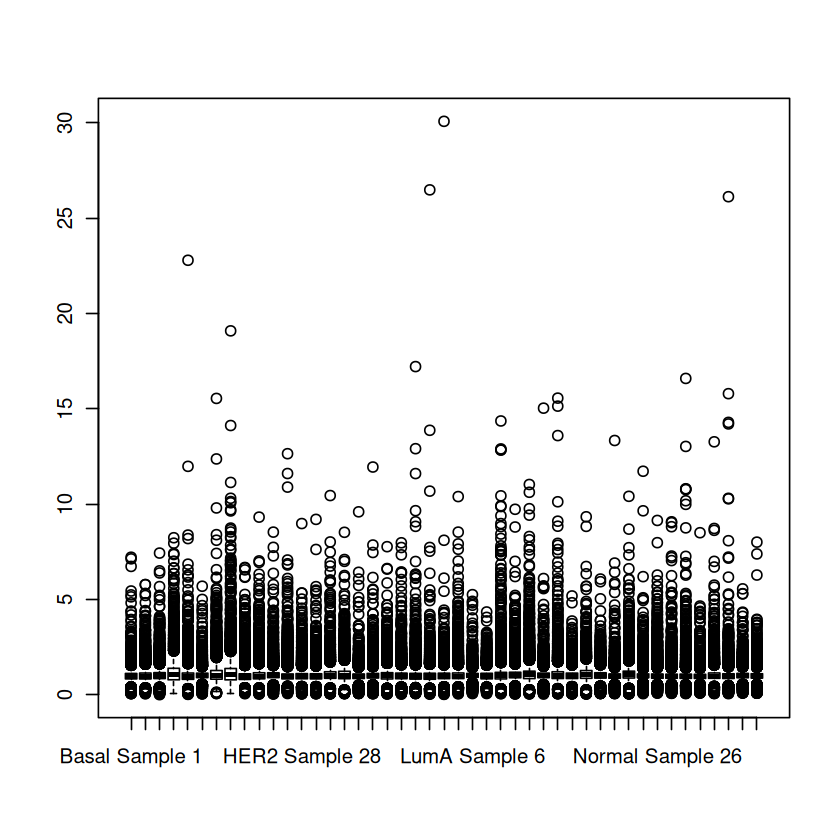

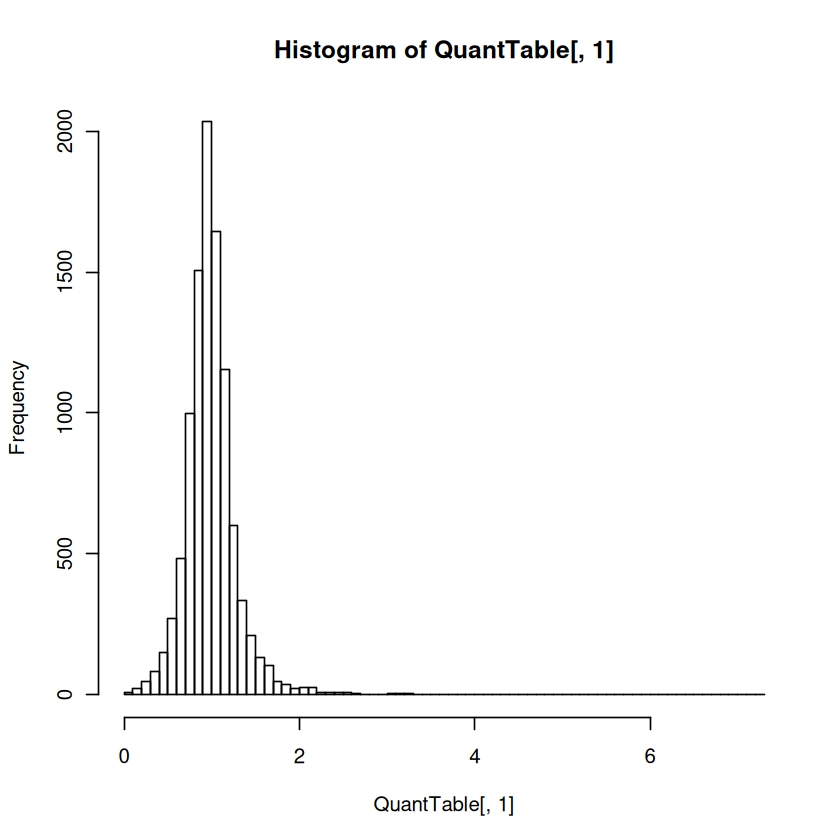

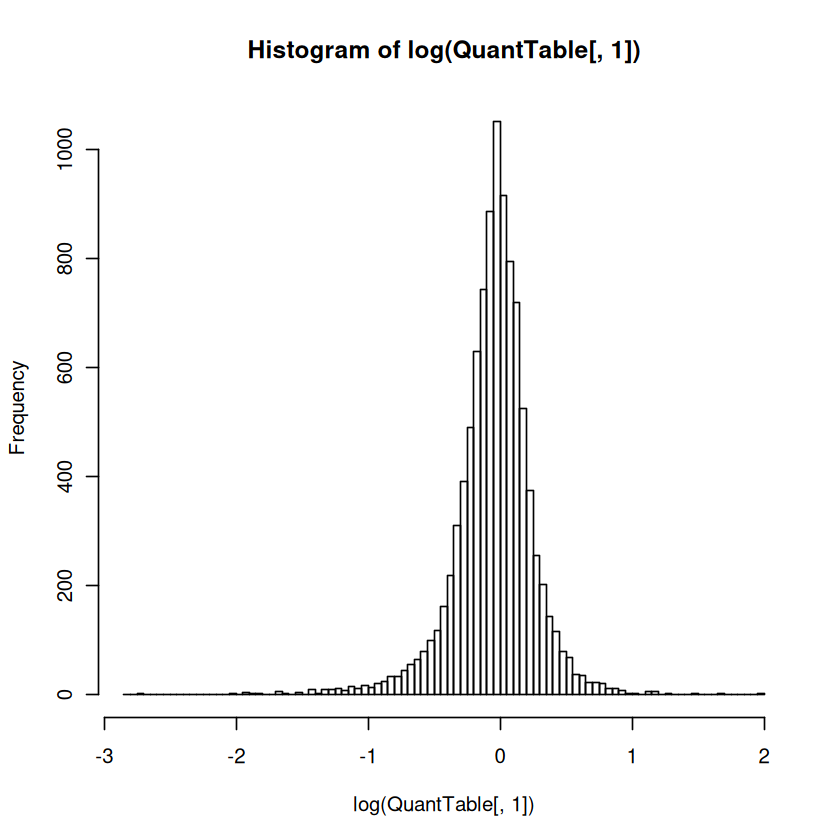

Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'xlim' values


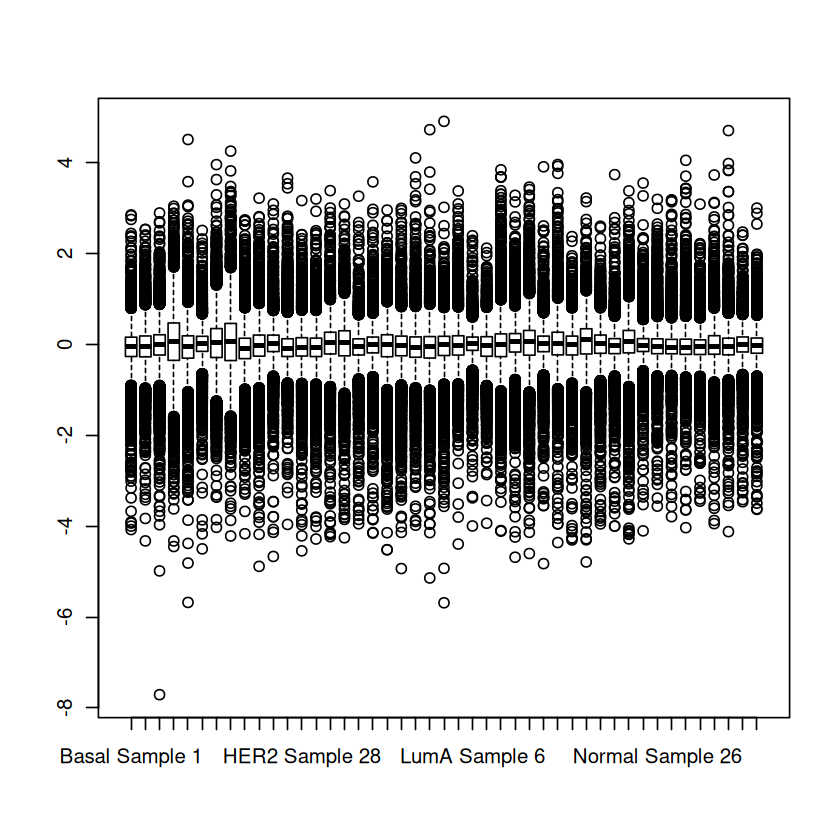

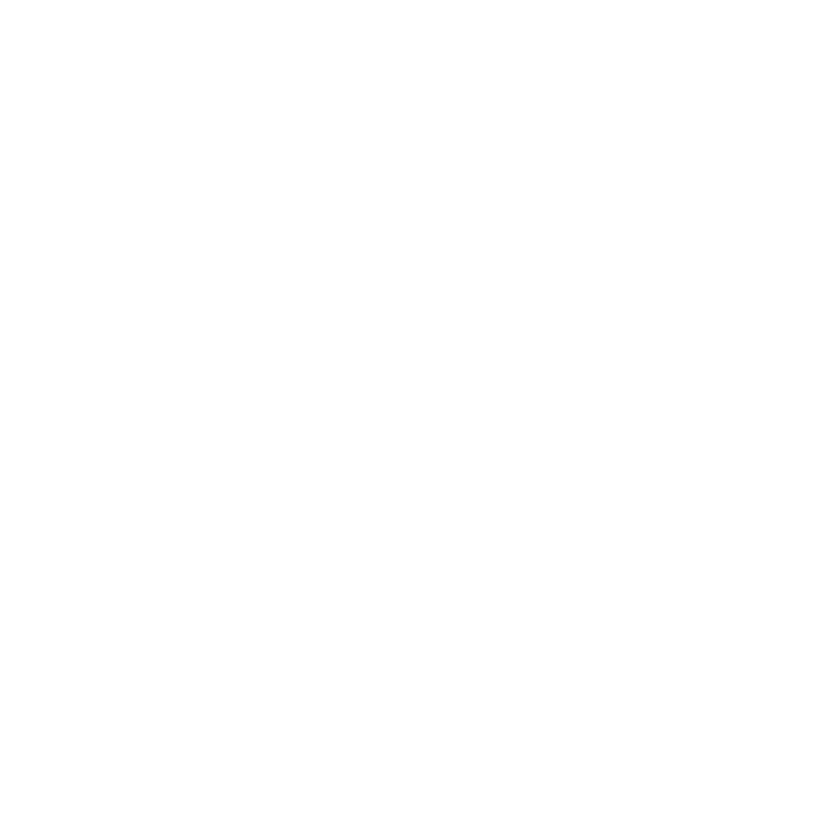

In [21]:
# some figures
boxplot(QuantTable)
hist(QuantTable[,1],100)

# Why is the distribution so assymetric? Take log?
hist(log(QuantTable[,1]),100)

# log-trafo
lQuantTable <- log2(QuantTable)
boxplot(lQuantTable)

# scatter plot
plot(lQuantTable$Set.1.TMT10Tag_126, lQuantTable$Set.1.TMT10Tag_129C, pch=15, col="#33333366")



#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins>The data seems to centered. Around which value?</ins>

_Answer_

##### Question II:  <ins>Which normalization was used by the authors of the paper? On which data level (PSMs, peptides, proteins)? How is that visible in the plots</ins>

_Answer_

##### Question III:  <ins>Any idea why the distribution is so sharp?</ins>

_Answer_


##### Question IV:  <ins>Why can't you see any linear relationship between the samples?</ins>

_Answer_




### Dynamic range, similarity and missing values

In the following, we will calculate the dynamic range of the, get more impression about data similarity by calculating correlations, and assess the number of missing values

[1] 6291.011


   0 
9995 

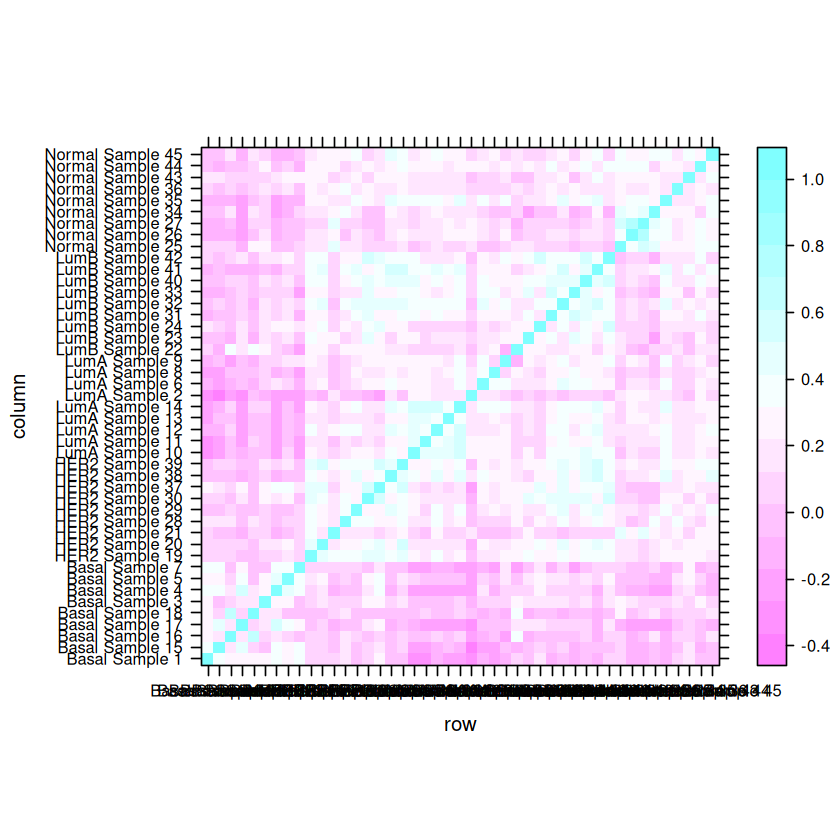

In [22]:
# What is the dynamics range of the data?
2^(max(lQuantTable)-min(lQuantTable))


# Correlations between samples, replicates should show higher correlations
library(lattice)
levelplot(cor(lQuantTable))

# Number of missing values per column
table(rowSums(is.nan(as.matrix(lQuantTable))))


#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins>What does the dynamics range mean? Is it larger or smaller than expected? Take a look at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2938101/ to find more explanations.</ins>

_Answer_

##### Question II:  <ins>Do you find similarity between replicates? Is there a sample that seems to be displaced? How are the types distributed over the TMT runs?</ins>

_Answer_

##### Question II:  <ins>How many missing values does the data have per column? Why so many/few? Would you analyze the data differently?</ins>

_Answer_



### Principal component analysis
PCA analysis is a way to plot multi-dimensional data via projection to the so-called principal components. 
Simple explanation: # create Ensembl set
eQuantTable <- QuantTable
rownames(eQuantTable) <- rQuantTable[,1]



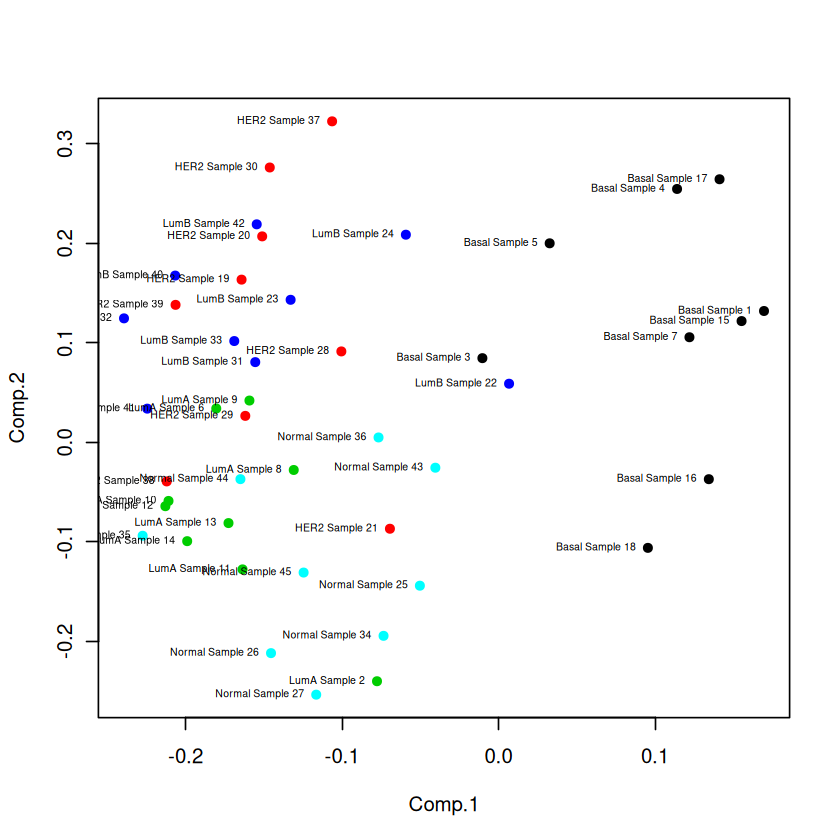

In [26]:
# write into file for usage in  VSClust later on
write.csv(lQuantTable,"../../../Data/PMC6453966_VSClust_in.csv")

# PCA for some testing
pca.out <- princomp((QuantTable), cor = T)

#scoring plot
plot(pca.out$loadings, pch=16, col=rep(1:5,each=9) )
text(pca.out$loadings, pos=2, labels=colnames(lQuantTable),cex=0.5)



#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins>How would you interpret a PCA loading plot?</ins>

_Answer_

##### Question II:  <ins>Can the different cancer subtypes be distinguished? If yes/no, what could be the biological reason? </ins>

_Answer_

##### Question III:  <ins>Can you predict which subtype should show most of the differences?</ins>

_Answer_



### Hierarchical clustering

This cluster analysis is super-easy in R and provides a nice view of common changes within the proteins.

The disadvantage of this clustering is its limitation to smaller data sets as the plots get very messy for thousands of proteins. Therefore, we will target a subset and cluster it in some examples.

More specifically, we will take the 100 proteins with the largest changes of their averaged abundance between the two cancer subtypes. 

The clustering will be carried out for the averaged and the full data. Basing the analysis on averaged values only would neglected biological variance, and thus most likely lead to erronenous interpretations.

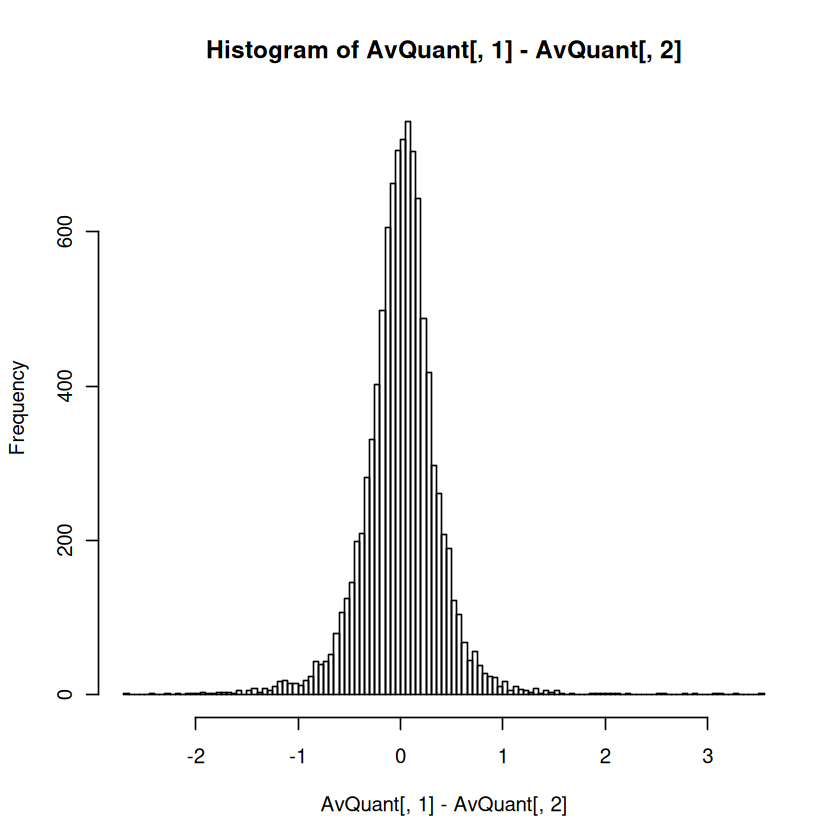

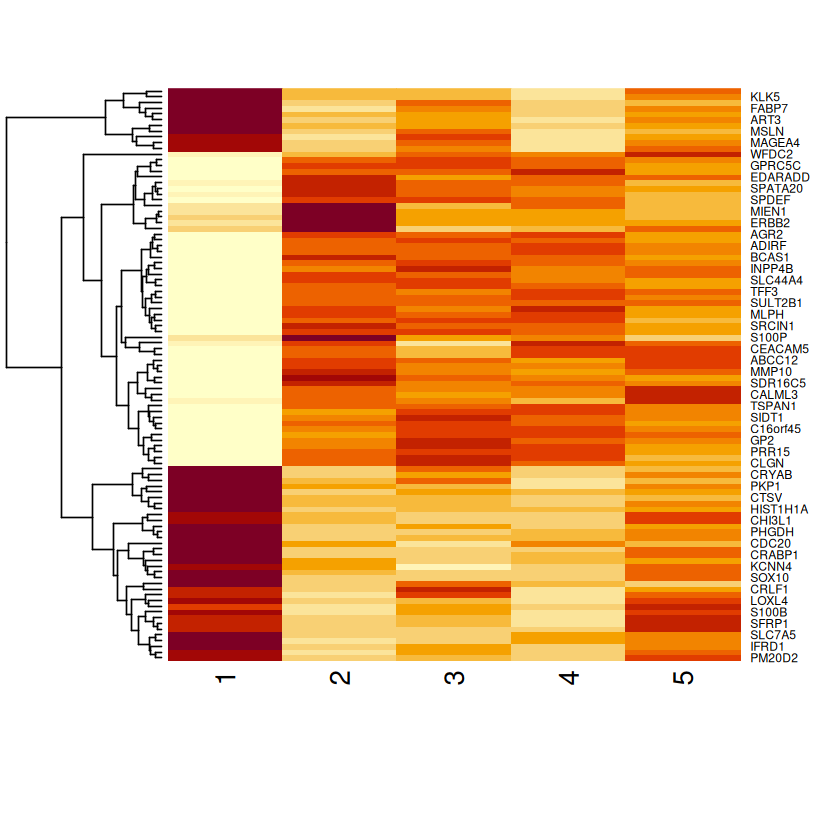

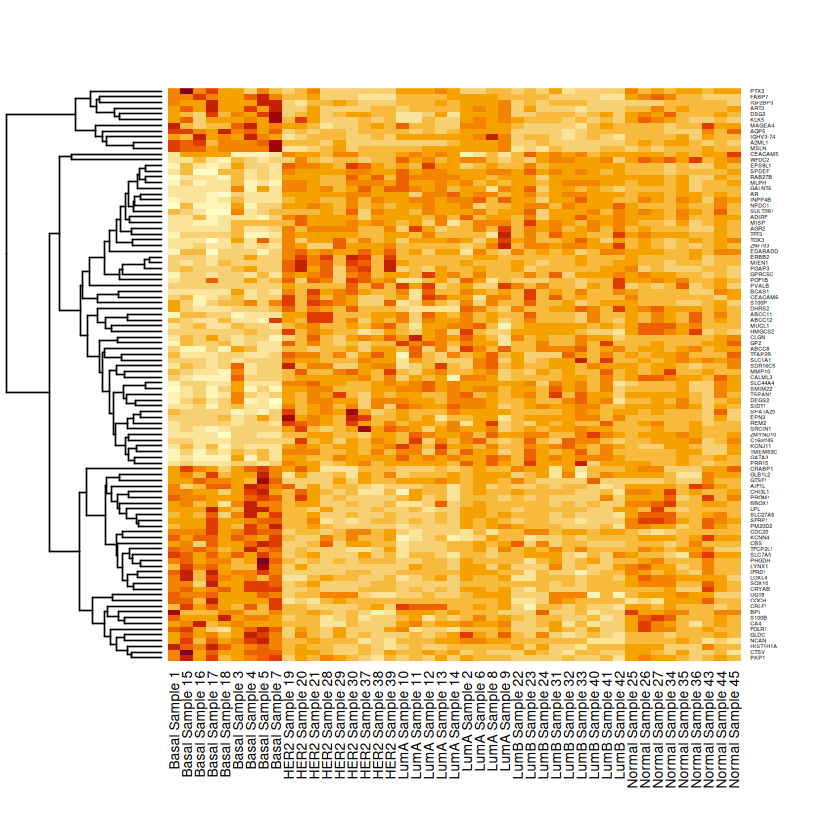

In [31]:
# heat map of the most changing proteins between  the  first 2 conditions

# Calculate means of each cancer subtype
AvQuant <- NULL
for (i in 1:5)
  AvQuant  <- cbind(AvQuant, rowMeans(lQuantTable[,(i-1)*9+(1:9)]))

# histogram of changes between the averages abundances
hist(AvQuant[,1] - AvQuant[,2], 100)  

# What happens with the 100 most different proteins?
mostDiffInd <- names(sort(abs(AvQuant[,1] - AvQuant[,2]), decreasing = T)[1:100])
heatmap(AvQuant[mostDiffInd,], Colv=NA)

# Now look on the replicate level (full data). Do you still have the same impression of significant changes?
heatmap(as.matrix(lQuantTable[mostDiffInd,]), Colv = NA,cexRow = 0.3)


#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins>Which is the expected fold-change of the most changing proteins?</ins>

_Answer_

##### Question II:  <ins>Is there a difference in the number of proteins increasing/decreasing in the second conditions (within the 100 most changing ones)?</ins>

_Answer_

##### Question III:  <ins>What does the this command do? `names(sort(abs(AvQuant[,1] - AvQuant[,2]), decreasing = T)[1:100])`</ins>

_Answer_

##### Question IV:  <ins>Would you still consider the top 100 proteins to show significant changes between the first 2 conditions? Assume an FDR of 1% or 5%</ins>

_Answer_



### Digging deeper into the behavior of one protein

Let's take one of the top 100 proteins and check it quantitative values, and also look it up.

For that, plot its abundance over all replicates and conditions using colors for the different cancer subtypes.

Do some search in the web about the function of CRABP1 and whether it is related to any cancer.
Use uniprot.org as starting point. 

Now search Google for _breast cancer_ and _CRABP1_. 

Get a random human protein from UniProt: 

https://www.uniprot.org/uniprot/?query=reviewed:yes+AND+organism:9606&random=yes

Look it up again and do also the cancer search on Google. 


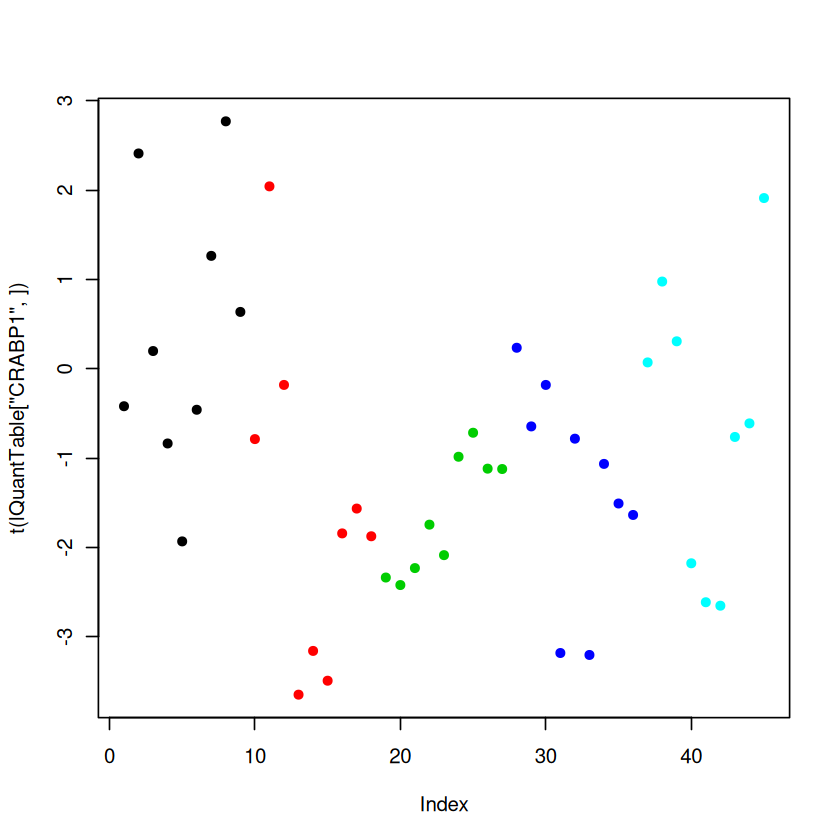

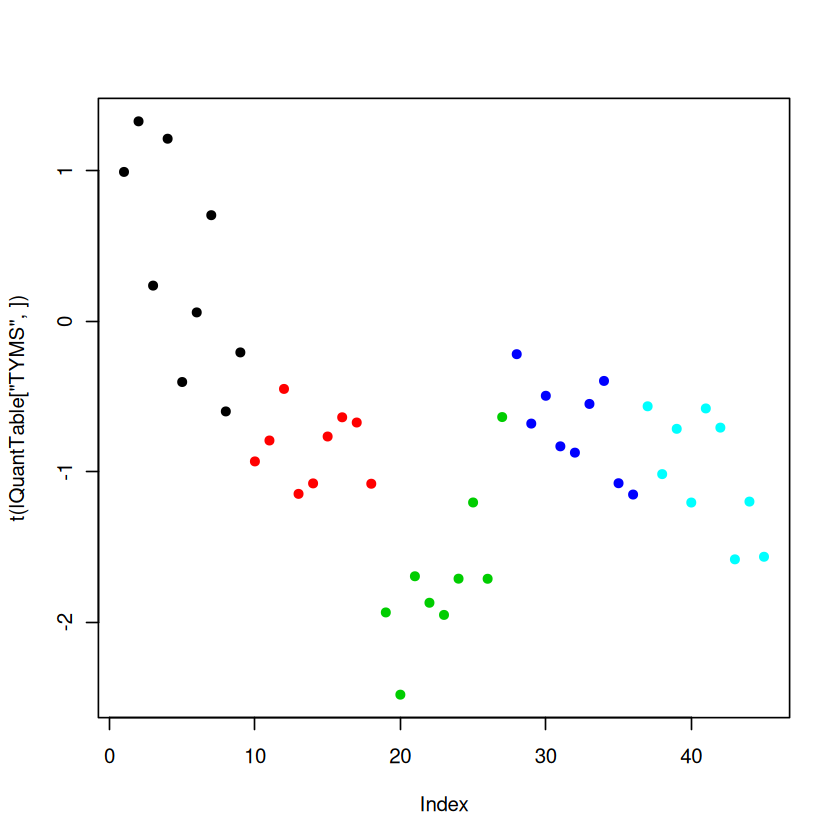

In [35]:
# Take e.g. MUC5B
plot(t(lQuantTable["CRABP1",]), pch=16, col=rep(1:5,each=9))



#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins>The comparison between which conditions is likely to be statistical significant (e.g. with FDR 1%)?</ins>

_Answer_

##### Question II:  <ins>If the difference between expression in subtypes 1 and 2 is not that evident and might not lead to a significant result from statistical testing? How could you create better evidence?</ins>

_Answer_

##### Question III:  <ins>Do you consider CRABP1 or the randomly chosen protein to have a stronger relation to breast cancer?</ins>

_Answer_



### Statistics and clustering using VSClust
You will now analyze the quantitative data to VSClust. 
There are several possibilities to run the Shiny App:
a) Download the docker image `docker pull veitveit/VSClust` and run  it using `docker run -p3838:3838 veitveit/VSClust`. You can access the app via localhost:3838/VSClust in your browser afterwards
b) Run it on the IFB cloud: TODO
c) Run it on the server (here we have a max. of 1 person a time): http://computproteomics.bmb.sdu.dk/Apps/VSClust

First play with the example and become familiar with the app

Then upload the csv-file you saved above and get the results from the statistical tests ( _Download q-values and mean log-values_ ).

Run the estimation of the cluster number (this will take some time) and look at the plots of the validation indices and the number of proteins that still get assigned to clusters. The variance-sensitive version of the fuzzy c-means account for the uncertainty of a measurement and thus is more stringent in filtering out proteins with unclear cluster assignments. 

Run both clustering methods for the suggested number of clusters. 

Repeat this for a higher number of clusters.

Now redo the analysis by wrongly stating that the replicates are _not_ grouped.

<ins>Note</ins> Do not run the pathway enrichment when using the app in docker or on the cloud.


#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins>How many proteins are changing significantly between subtypes 1 and 2 (in the app A and B) having a q-value below 0.01? Is CRABP1 one of them? Would you have expected this FDR (q-value) for CRABP1?</ins>

_Answer_

##### Question II:  <ins>Which cancer subtype is most different from the first one? Does this observation conincide with what you see in the PCA plot?</ins>

_Answer_

##### Question III:  <ins>How many clusters suggested by the indices? How many proteins (approximately) would you then get in the clusters? How noisy do you consider the dataset? Does the variance-sensitive method filter out many proteins</ins>

_Answer_

##### Question IV:  <ins>When running the "wrong" experimental design, what is different when looking on statistical results, estimation of cluster number and clustering results?</ins>

_Answer_



### Having a look into GO terms and pathways

Download the clustering results and upload the proteins of each of the clusters (separately) to GOrilla. 
Do the same uploading them to enrichnet.org

Take a deeper look into how enrichnet works (e.g. by looking into the tutorial).

#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins>How many cluster members do you get? What are the main trends when comparing all cancer subtypes?</ins>

_Answer_

##### Question II:  <ins>Do you get the same result for the GO term enrichment? If not, what could be the reason?</ins>

_Answer_

##### Question III:  <ins>Any useful biology coming out? Check the original papers for the specific cancer subtypes.</ins>

_Answer_



#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins></ins>

_Answer_

##### Question II:  <ins>?</ins>

_Answer_

##### Question II:  <ins>?</ins>

_Answer_



#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <ins></ins>

_Answer_

##### Question II:  <ins>?</ins>

_Answer_

##### Question II:  <ins>?</ins>

_Answer_

